In [1]:
import torchvision.transforms as tfs
from src.models.utils import download_checkpoint, load_model
from src.experiments import *
from src.experiments.utils import *
from src.visualization import *
from src.optimization import *
from IPython.display import Image 
from PIL import Image

checkpoint_path = download_checkpoint("https://drive.google.com/file/d/19m_SaRNEF7JXHjeyNu26AxgaEQXqpI00", "protopnet.pt")
model = load_model('protopnet', checkpoint_path, device="cpu")
img_size = 224

# Draw heatmaps for bird image

C:\Users\dorot\anaconda3\envs\ml\lib\site-packages\torch\nn\functional.py:3635: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


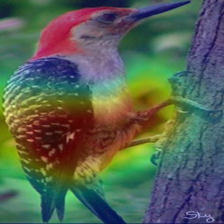

In [2]:
# Set superimposed to True if you want heatmap over the original image
input_image = Image.open("data/train_cropped/189.Red_bellied_Woodpecker/Red_Bellied_Woodpecker_0002_180879.jpg")
heatmap(model, input_image, 188, 0, superimpose=True)

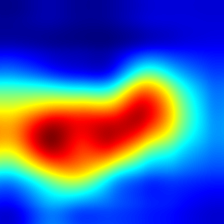

In [3]:
heatmap(model, input_image, 188, 0, False)

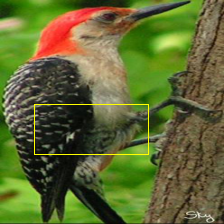

In [4]:
img = visualize_real_prototype(model,"189.Red_bellied_Woodpecker/Red_Bellied_Woodpecker_0002_180879.jpg" , 188, 0)
display(img)

# Draw heatmap for visuzalized prototype

step: 0/500, loss: 4.107443809509277
step: 100/500, loss: 0.2359946072101593
step: 200/500, loss: 0.03416162356734276
step: 300/500, loss: 0.033459097146987915
step: 400/500, loss: 0.03002960793673992


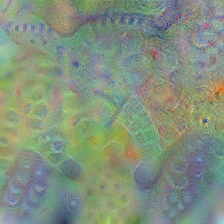

In [5]:
ptypes = [(188,0)]
size = (3, 224, 224)

init_tensor = torch.rand(size)
transforms = [ClampingMinMax(0, 1)]
robustness_transforms = [tfs.GaussianBlur(7, 2)]
parametrization_transforms = [NormalizationMeanStd()]
denormalization_transforms = [DenormalizationMeanStd()]

input_tensor = init_tensor.clone()
image_bf = visualize_prototypes(model, 
                                ptypes,
                                optimization_steps=500, 
                                input_tensor=input_tensor,
                                transforms=transforms, 
                                robustness_transforms=robustness_transforms,
                                parametrization_transforms=parametrization_transforms,
                                denormalization_transforms=denormalization_transforms,
                                optimizer_kwargs={'lr': 0.2}, 
                                print_interval=100,
                                display_interval=None)
pilimg_bf = tfs.ToPILImage()(image_bf)
display(pilimg_bf)

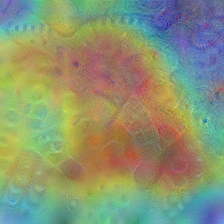

In [6]:
heatmap(model, pilimg_bf, 188, 0, superimpose=True)